![title](../../images/header.png)

Merging CEO data phase II (2015-2022)
-------
This notebook merges validated data from different CEO CAFI projects for 2015-2022
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

## Enter parameters

In [2]:
#identifier for country 
# COD COG CMR GAB EQG CAF
iso = 'COG'

### 1. Read all CEO sample files from eSBAE
download your CEO sample files from collect.earth and upload to SEPAL using FileZilla.
add as many files as you have projects

In [3]:
#COG
ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/COG/ceo-NERF_2016_2022_CONGO_set1-sample-data.csv')
ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/COG/ceo-NERF_2016_2022_CONGO_set2-sample-data.csv')

make a list of the ceo files for processing

In [4]:
ceo_files = [ceo1,ceo2]

In [5]:
# output file  CEO validated data file with select columns
ceo_data_out =  '/home/sepal-user/module_results/esbae/COG/COG_all_ceo_NERF1622_clean.csv'

In [6]:
ceo1['collection'] = 'coll_1622_1'
ceo2['collection'] = 'coll_1622_2'

### end of parameters

In [7]:
ceo1.head()

,plotid,sampleid,lon,lat,email,flagged,collection_time,analysis_duration,imagery_title,imagery_attributions,sample_geom,pl_aspect,pl_brightness_max,pl_red_mean,pl_greenness_max,pl_stratum,pl_cusum_confidence,pl_cusum_change_date,pl_nir_max,pl_red_min,pl_bfast_means,pl_elevation,pl_red_sd,pl_cnc_1520,pl_swir1_sd,pl_index,pl_tmf_sub,pl_dw_tree_prob__min,pl_bs_slope_max,pl_red_max,pl_images,pl_dist,pl_bfast_magnitude,pl_ccdc_magnitude,pl_simple_combined,pl_tmf_defyear,pl_greenness_mean,pl_tmf_2019,pl_swir2_sd,pl_nir_sd,pl_gfc_tc00,pl_greenness_min,pl_tmf_degyear,pl_tmf_2020,pl_tmf_2017,pl_bs_slope_min,pl_lang_tree_height,pl_bs_slope_sd,pl_dw_class_mode,pl_swir1_mean,pl_wetness_sd,pl_bs_slope_mean,pl_ccdc_change_date,pl_dw_tree_prob_mean,pl_nir_mean,pl_dw_tree_prob__stddev,pl_tmf_2016,pl_nir_min,pl_esri_lc17,pl_wetness_mean,pl_ndfi_min,pl_wetness_min,pl_point_id,pl_kmeans,pl_swir2_mean,pl_esri_lc19,pl_slope,pl_cusum_magnitude,pl_esri_lc18,pl_gfc_loss,pl_esri_lc20,pl_swir1_max,pl_swir1_min,pl_mon_images,pl_esa_lc20,pl_brightness_min,pl_brightness_mean,pl_potapov_tree_height,pl_gfc_lossyear,pl_wetness_max,pl_swir2_max,pl_bfast_change_date,pl_gfc_gain,pl_brightness_sd,pl_tmf_2018,pl_dw_tree_prob__max,pl_ndfi_max,pl_esri_lc21,pl_swir2_min,pl_esa_lc21,pl_ndfi_sd,pl_tmf_main,pl_greenness_sd,pl_chg_prob,pl_ndfi_mean,forêt ou non-forêt en 2016?,Type de non-forêt en 2016,Type de forêt en 2016,Y-a t-il un changement négatif sur la période 2016-2022,Quel type de changement ?,Indiquez l'année du changement 1,Type de moteur pour changement 1,Le feu a t-il causé le changement ?,Décrivez autres,y-a t-il un second changement ?,Type du changement 2 (1),Type de moteur pour changement 2 (1),Le feu a t-il causé le changement ?.1,Décrivez autres (1) (0),Y-a t-il eu régénération ?,Indiquez la date de la régénération,Définir la strate en 2022,Type de non-forêt en 2022,Type de forêt en 2022,Commentaires,collection
0,593989,593989,11.830695,-4.614429,ndandoularissa7@gmail.com,False,2023-11-23 11:18,671.0 secs,NaN,NaN,POINT(11.830695173657306 -4.614429379541612),173.0,10000.0,4658.746732,10000.0,1,0.351460,2021.277,10000.0,-7570.500000,-1.815353,51.562649,3663.246080,NaN,3663.246080,134403,91.0,4.0,322.659446,10000.0,64,30167476,-6871.895508,-542.391606,0.118000,0.0,4658.746732,6.0,3663.246080,3663.246080,17.0,-7570.500000,0.0,6.0,6.0,-1150.694871,11.0,209.116247,5.0,4658.746732,3663.246080,-525.402730,2016.066,13.0,4658.746732,3.0,6.0,-7570.500000,11.0,4658.746732,-7570.500000,-7570.500000,593989,1,4658.746732,11.0,15.0,44488.104575,11.0,0.0,11.0,10000.0,-7570.500000,51,30.0,-7570.500000,4658.746732,0.0,NaN,10000.0,10000.0,2018.605,0.0,3663.246080,6.0,19.0,10000.0,11.0,-7570.500000,30.0,3663.246080,70.0,3663.246080,0.118000,4658.746732,non-forêt,savane herbacée,NaN,Non,NaN,NaN,NaN,NaN,NaN,Non,NaN,NaN,NaN,NaN,Non,NaN,non-forêt,savane herbacée,NaN,rentrez vos commentaires,coll_1622_1
1,594521,594521,12.080400,-4.345648,ndandoularissa7@gmail.com,False,2023-11-23 11:48,343.8 secs,NaN,NaN,POINT(12.08040037354922 -4.345648145343055),38.0,10000.0,9383.554167,10000.0,1,0.358271,2017.334,10000.0,1700.000000,13.344563,78.641037,1539.613068,NaN,1539.613068,148976,10.0,2.0,345.147249,10000.0,49,39502876,3448.300049,-1181.426217,0.079333,0.0,9383.554167,1.0,1539.613068,1539.613068,90.0,1700.000000,0.0,1.0,1.0,-4.255706,36.0,61.939067,1.0,9383.554167,1539.613068,126.267001,2017.860,64.0,9383.554167,22.0,1.0,1700.000000,10.0,9383.554167,1700.000000,1700.000000,594521,1,9383.554167,2.0,7.0,15818.850000,2.0,0.0,2.0,10000.0,1700.000000,40,10.0,1700.000000,9383.554167,34.0,NaN,10000.0,10000.0,2022.526,0.0,1539.613068,1.0,75.0,10000.0,2.0,1700.000000,10.0,1539.613068,10.0,1539.613068,0.079333,9383.554167,forêt,NaN,3 - forêt secondaire,Non,NaN,NaN,NaN,NaN,NaN,Non,NaN,NaN,NaN,NaN,Non,NaN,forêt,NaN,3 - forêt secondaire,rentrez vos commentaires,coll_1622_1
2,704830,704830,11.959924,-4.114974,ndandoularissa7@gmail.com,False,2023-11-27 12:14,1157.0 secs,Planet NICFI Public,NaN,POI

In [8]:
column_names = ceo1.columns.tolist()
# Print the list of column names
print(column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'imagery_title', 'imagery_attributions', 'sample_geom', 'pl_aspect', 'pl_brightness_max', 'pl_red_mean', 'pl_greenness_max', 'pl_stratum', 'pl_cusum_confidence', 'pl_cusum_change_date', 'pl_nir_max', 'pl_red_min', 'pl_bfast_means', 'pl_elevation', 'pl_red_sd', 'pl_cnc_1520', 'pl_swir1_sd', 'pl_index', 'pl_tmf_sub', 'pl_dw_tree_prob__min', 'pl_bs_slope_max', 'pl_red_max', 'pl_images', 'pl_dist', 'pl_bfast_magnitude', 'pl_ccdc_magnitude', 'pl_simple_combined', 'pl_tmf_defyear', 'pl_greenness_mean', 'pl_tmf_2019', 'pl_swir2_sd', 'pl_nir_sd', 'pl_gfc_tc00', 'pl_greenness_min', 'pl_tmf_degyear', 'pl_tmf_2020', 'pl_tmf_2017', 'pl_bs_slope_min', 'pl_lang_tree_height', 'pl_bs_slope_sd', 'pl_dw_class_mode', 'pl_swir1_mean', 'pl_wetness_sd', 'pl_bs_slope_mean', 'pl_ccdc_change_date', 'pl_dw_tree_prob_mean', 'pl_nir_mean', 'pl_dw_tree_prob__stddev', 'pl_tmf_2016', 'pl_nir_min', 'pl_esri_lc17', 'pl_wet

In [9]:
# List all values of a column
values_list = ceo2['Type de forêt en 2016'].value_counts()
print(values_list)

Type de forêt en 2016
3 - forêt secondaire          401
1 - forêt dense               293
9 - forêt galérie              93
8 - forêt marécageuse          66
4- forêt claire                 7
10 - plantation forestière      6
7 - forêt mangrove              1
Name: count, dtype: int64


In [10]:
# List all values of a column
values_list = ceo2['Type de non-forêt en 2022'].value_counts()
print(values_list)

Type de non-forêt en 2022
savane herbacée                 415
savane arbustive/arborée        303
terres cultivées annuelles      115
eau                              46
sol nu végétation éparse         42
prairie aquatique                41
terres cultivées permanentes     12
zone baties                       8
Name: count, dtype: int64


##### add a column named "interpreted" which = 1 when the point has been validated in CEO, otherwise 0
count the number of validated points per ceo file
replace forest and non-forest types with codes

In [11]:
# List to store the modified DataFrames
modified_ceo_files = []

# Initialize collection counter
collection_counter = 1

for i, ceo in enumerate(ceo_files):
       
    # Sort the DataFrame by 'date' in descending order
    ceo.sort_values(by='collection_time', ascending=True, inplace=True)

    # Remove duplicates keeping the last occurrence (the most recent date)
    ceo.drop_duplicates(subset='sample_geom', keep='first', inplace=True)

    # Reset the index
    ceo.reset_index(drop=True, inplace=True)
    
    # Add 'interpreted' column with 1 when 'email' is not null, otherwise 0
    ceo['interpreted'] = np.where(ceo['email'].notna(), 1, 0)
    
    # Calculate total count for each 'interpreted' value
    interpreted_counts = ceo['interpreted'].value_counts().to_dict()
    
    # Append the modified DataFrame to the list
    modified_ceo_files.append(ceo)
    
    # Print count for the current DataFrame
    print(f"ceo {i + 1} # of validated points: {interpreted_counts.get(1, 0)}, # of not validated points: {interpreted_counts.get(0, 0)}")


# Concatenate the modified DataFrames into one merged DataFrame
merged_ceo = pd.concat(modified_ceo_files, ignore_index=True)


# Specify the columns you want to keep in the merged DataFrame
columns_to_keep = ['plotid', 'pl_point_id','sampleid', 'lon', 'lat', 
                    'sample_geom',  
                   'forêt ou non-forêt en 2016?', 
                   'Type de non-forêt en 2016', 
                   'Type de forêt en 2016', 
                   'Y-a t-il un changement négatif sur la période 2016-2022', 
                   'Quel type de changement ? ',
                   "Indiquez l'année du changement 1",
                   'Type de moteur pour changement 1', 
                   'Le feu a t-il causé le changement ?', 
                   'Décrivez autres', 'y-a t-il un second changement ?', 
                   'Type du changement 2 (1)', 
                   'Type de moteur pour changement 2 (1)', 
                   'Le feu a t-il causé le changement ?.1', 
                   'Décrivez autres (1) (0)', 
                   'Y-a t-il eu régénération  ?', 
                   'Indiquez la date de la régénération',
                   'Définir la strate en 2022 ', 
                   'Type de non-forêt en 2022', 
                   'Type de forêt en 2022', 
                   'Commentaires', 'collection','interpreted']

# Select only the specified columns
merged_ceo = merged_ceo[columns_to_keep]

# Create a dictionary to map old column names to new column names
column_mapping = {
    'pl_point_id':'point_id',
    'forêt ou non-forêt en 2016?': 'Ref_FNF_2016',
    'Type de forêt en 2016':'Ref_Ftype_2016',
    'Type de non-forêt en 2016':'Ref_NFtype_2016',
    'Y-a t-il un changement négatif sur la période 2016-2022':'Ref_Change_1622', 
    'Quel type de changement ? ':'Ref_Change_Type_1622',
    "Indiquez l'année du changement 1":'Ref_Year_1622',
    'Type de moteur pour changement 1':'Ref_Driver_1622',
    'Décrivez autres':'Other',
    'Le feu a t-il causé le changement ?':'Ref_Fire_1622', 
    'y-a t-il un second changement ?':'Ref_Change2_1622', 
    'Type du changement 2 (1)':'Ref_Change2_Type_1622', 
    'Type de moteur pour changement 2 (1)':'Ref_Driver2_1622', 
    'Le feu a t-il causé le changement ?.1':'Ref_Fire2_1622', 
    'Décrivez autres (1) (0)':'Other2', 
    'Y-a t-il eu régénération  ?':'Ref_Regeneration',
    'Indiquez la date de la régénération':'Ref_Regen_Year',
    'Définir la strate en 2022 ':'Ref_FNF_2022',
    'Type de non-forêt en 2022':'Ref_NFtype_2022', 
    'Type de forêt en 2022':'Ref_Ftype_2022'

}

# Use the rename() method to rename the columns
merged_ceo = merged_ceo.rename(columns=column_mapping)

# Define the replacements as a dictionary
replace_dict = {
    'Ref_FNF_2016': {'non-forêt': '0', 'forêt': '1'},
    'Ref_Ftype_2016': {'1 - forêt dense': '1', '2 - forêt dense sèche': '2', '3 - forêt secondaire': '3','4- forêt claire': '4','7 - forêt mangrove': '7',
                 '8 - forêt marécageuse': '8', '9 - forêt galérie': '9','10 - plantation forestière': '10', '11- savane arborée': '11'},
    'Ref_NFtype_2016': {'savane arborée/arbustive': '12', 'savane herbacée': '13','prairie aquatique': '14', 'sol nu végétation éparse': '15',
                  'terres cultivées annuelles': '16', ' zone baties': '17', 'eau ': '18', 'terres cultivées permanentes':'16'},
    'Ref_FNF_2022': {'non-forêt': '0', 'forêt': '1'},
    'Ref_Ftype_2022': {'1 - forêt dense': '1', '2 - forêt dense sèche': '2', '3 - forêt secondaire': '3','4- forêt claire': '4','7 - forêt mangrove': '7',
                 '8 - forêt marécageuse': '8', '9 - forêt galérie': '9','10 - plantation forestière': '10', '11- savane arborée': '11'},
    'Ref_NFtype_2022': {'savane arbustive/arborée': '12', 'savane herbacée': '13','prairie aquatique': '14', 'sol nu végétation éparse': '15',
                  'terres cultivées annuelles': '16', 'zone baties': '17', 'eau': '18', 'terres cultivées permanentes':'16'},
    'Ref_Change_1622': {'Oui':'1','Non':'0','':'0'},
    'Ref_Change_1622': {'Oui':'1','Non':'0','':'0'},
    'Ref_Change2_1622': {'Oui':'1','Non':'0','':'0'},
    'Ref_Fire_1622': {'oui':'1','non':'0','':'0'},
    'Ref_Fire2_1622': {'Oui':'1','Non':'0','':'0'},
    'Ref_Regeneration': {'Oui':'1','Non':'0','':'0'},
    'Ref_Change_Type_1622': {'Dégradation':'Deg','Déforestation ':'Def','':'0'},
    'Ref_Change2_Type_1622': {'Dégradation':'Deg','Déforestation':'Def','':'0'},
}

# Use the replace() method to replace strings in specified columns
merged_ceo.replace(replace_dict, inplace=True)

columns_to_fill = ['Ref_Change_1622']
# Set NaN values in the selected columns to 0
merged_ceo[columns_to_fill] = merged_ceo[columns_to_fill].fillna('0')

ceo 1 # of validated points: 1000, # of not validated points: 0
ceo 2 # of validated points: 1815, # of not validated points: 185


remove non validated points and remove duplicates

In [12]:
merged_ceo_interpreted = merged_ceo[merged_ceo['interpreted'] == 1]

In [13]:
ceo_column_names = merged_ceo_interpreted.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2016', 'Ref_NFtype_2016', 'Ref_Ftype_2016', 'Ref_Change_1622', 'Ref_Change_Type_1622', 'Ref_Year_1622', 'Ref_Driver_1622', 'Ref_Fire_1622', 'Other', 'Ref_Change2_1622', 'Ref_Change2_Type_1622', 'Ref_Driver2_1622', 'Ref_Fire2_1622', 'Other2', 'Ref_Regeneration', 'Ref_Regen_Year', 'Ref_FNF_2022', 'Ref_NFtype_2022', 'Ref_Ftype_2022', 'Commentaires', 'collection', 'interpreted']


In [14]:
merged_ceo_interpreted.head()

,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2016,Ref_NFtype_2016,Ref_Ftype_2016,Ref_Change_1622,Ref_Change_Type_1622,Ref_Year_1622,Ref_Driver_1622,Ref_Fire_1622,Other,Ref_Change2_1622,Ref_Change2_Type_1622,Ref_Driver2_1622,Ref_Fire2_1622,Other2,Ref_Regeneration,Ref_Regen_Year,Ref_FNF_2022,Ref_NFtype_2022,Ref_Ftype_2022,Commentaires,collection,interpreted
0,544528,544528,544528,11.465031,-4.201262,POINT(11.46503105087053 -4.201262453232476),0,13,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0,13,NaN,rentrez vos commentaires,coll_1622_1,1
1,928627,928627,928627,14.949047,-2.530665,POINT(14.949047099656235 -2.530664702660032),0,12,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0,12,NaN,rentrez vos commentaires,coll_1622_1,1
2,593135,593135,593135,11.755113,-4.239780,POINT(11.755113410801398 -4.239780168132143),0,13,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0,13,NaN,rentrez vos commentaires,coll_1622_1,1
3,541957,541957,541957,11.235013,-3.836062,POINT(11.235012782129578 -3.83606207695526),1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,1,NaN,1,rentrez vos commentaires,coll_1622_1,1
4,931169,931169,931169,14.985277,-1.382339,POINT(14.985277295715491 -1.382339162972436),0,12,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0,12,NaN,RAS,coll_1622_1,1


In [15]:
merged_ceo_interpreted = merged_ceo_interpreted.sort_values(by='collection', ascending=True)

# Remove duplicates keeping the last occurrence (the most recent date)
merged_ceo_nodup = merged_ceo_interpreted.drop_duplicates(subset='sample_geom', keep='first')

# Reset the index
merged_ceo_nodup = merged_ceo_nodup.reset_index(drop=True)

##### count points in different categories

In [16]:
merged_ceo_nodup['interpreted'].value_counts(dropna=False)

interpreted
1    2815
Name: count, dtype: int64

In [17]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Ref_Change_1622'],columns=['interpreted'],aggfunc="count")

interpreted,1
Ref_Change_1622,
0,2668
1,147


In [18]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Ref_Change2_1622'],columns=['interpreted'],aggfunc="count")

interpreted,1
Ref_Change2_1622,
0,2806
1,9


In [19]:
merged_ceo_nodup['Ref_FNF_2016'].value_counts(dropna=False)

Ref_FNF_2016
1    1505
0    1310
Name: count, dtype: int64

In [20]:
merged_ceo_nodup['Ref_Change_Type_1622'].value_counts(dropna=False)

Ref_Change_Type_1622
NaN    2668
Deg      99
Def      48
Name: count, dtype: int64

In [21]:
merged_ceo_nodup['Ref_Change2_Type_1622'].value_counts(dropna=False)

Ref_Change2_Type_1622
NaN    2806
Def       8
Deg       1
Name: count, dtype: int64

In [22]:
merged_ceo_nodup['Ref_Ftype_2016'].value_counts(dropna=False)

Ref_Ftype_2016
NaN    1310
1       690
3       540
8       125
9       121
4        20
10        8
7         1
Name: count, dtype: int64

In [23]:
merged_ceo_nodup['Ref_NFtype_2016'].value_counts(dropna=False)

Ref_NFtype_2016
NaN               1505
13                 574
12                 435
16                 141
18                  59
14                  58
15                  30
17                  12
je ne sais pas       1
Name: count, dtype: int64

In [24]:
merged_ceo_nodup['Ref_NFtype_2022'].value_counts(dropna=False)

Ref_NFtype_2022
NaN               1462
13                 576
12                 422
16                 166
18                  60
14                  59
15                  56
17                  13
je ne sais pas       1
Name: count, dtype: int64

In [25]:
merged_ceo_nodup['Ref_Change_Type_1622'].value_counts(dropna=False)

Ref_Change_Type_1622
NaN    2668
Deg      99
Def      48
Name: count, dtype: int64

In [26]:
merged_ceo_nodup = merged_ceo_nodup.loc[merged_ceo_nodup['Ref_NFtype_2016'] != 'je ne sais pas']

In [27]:
merged_ceo_nodup = merged_ceo_nodup.loc[merged_ceo_nodup['Ref_NFtype_2022'] != 'je ne sais pas']

##### create a LC type column

In [28]:
merged_ceo_nodup['Ref_LCover_2016'] = merged_ceo_nodup['Ref_Ftype_2016'].fillna(merged_ceo_nodup['Ref_NFtype_2016'])
merged_ceo_nodup['Ref_LCover_2016'].value_counts(dropna=False)

Ref_LCover_2016
1     690
13    574
3     540
12    435
16    141
8     125
9     121
18     59
14     58
15     30
4      20
17     12
10      8
7       1
Name: count, dtype: int64

##### Check if values in 'pointid' are unique

In [29]:
# this might take some time
unique_check = merged_ceo_nodup['sample_geom'].nunique() == len(merged_ceo_nodup['sample_geom'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


##### if there are duplicates determine which points and which project (collection) and fix these in CEO: find the point id and enter the same correct interpretation for both users

In [30]:
# Find duplicate values in the 'ID' column
#duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='sample_geom', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
#len(duplicate_ids)

In [31]:
#merged_ceo_nodup.head()

### 2. add new columns for change and year

clean up columns and replace values

In [32]:
def f(x):
  if x['Ref_FNF_2016'] == '0' : return 'NF'
  elif x['Ref_Change_Type_1622'] == 'Def': return 'Def'
  elif x['Ref_Change_Type_1622'] == 'Deg' : return 'Deg'
  elif x['Ref_Change2_Type_1622'] == 'Deg' : return 'Deg'
  elif x['Ref_Change2_Type_1622'] == 'Def' : return 'Def'
  else: return 'Stable'

merged_ceo_nodup['Ref_Change_Type_1622'] =merged_ceo_nodup.apply(f, axis=1)
merged_ceo_nodup['Ref_Change_Type_1622'].value_counts()

Ref_Change_Type_1622
Stable    1370
NF        1309
Deg         86
Def         49
Name: count, dtype: int64

In [33]:
def y(x):
  if x['Ref_Change_Type_1622'] == 'Def' and x['Ref_Year_1622'] == 2016: return 'Def2016'
  elif x['Ref_Change_Type_1622'] == 'Def' and x['Ref_Year_1622'] == 2017: return 'Def2017'
  elif x['Ref_Change_Type_1622'] == 'Def' and x['Ref_Year_1622'] == 2018: return 'Def2018'
  elif x['Ref_Change_Type_1622'] == 'Def' and x['Ref_Year_1622'] == 2019: return 'Def2019'
  elif x['Ref_Change_Type_1622'] == 'Def' and x['Ref_Year_1622'] == 2020: return 'Def2020'
  elif x['Ref_Change_Type_1622'] == 'Def' and x['Ref_Year_1622'] == 2021: return 'Def2021'
  elif x['Ref_Change_Type_1622'] == 'Def' and x['Ref_Year_1622'] == 2022: return 'Def2022'
  elif x['Ref_Change_Type_1622'] == 'Deg' and x['Ref_Year_1622'] == 2016: return 'Deg2016'
  elif x['Ref_Change_Type_1622'] == 'Deg' and x['Ref_Year_1622'] == 2017: return 'Deg2017'
  elif x['Ref_Change_Type_1622'] == 'Deg' and x['Ref_Year_1622'] == 2018: return 'Deg2018'
  elif x['Ref_Change_Type_1622'] == 'Deg' and x['Ref_Year_1622'] == 2019: return 'Deg2019'
  elif x['Ref_Change_Type_1622'] == 'Deg' and x['Ref_Year_1622'] == 2020: return 'Deg2020'
  elif x['Ref_Change_Type_1622'] == 'Deg' and x['Ref_Year_1622'] == 2021: return 'Deg2021'
  elif x['Ref_Change_Type_1622'] == 'Deg' and x['Ref_Year_1622'] == 2022: return 'Deg2022'
  elif x['Ref_Change_Type_1622'] == 'NF' : return 'NF'
  #elif x['Ref_Change_Type_1522'] == 'Stable' : return 'Stable'
  else: return 'Stable'

merged_ceo_nodup['Ref_Change_Year_1622'] = merged_ceo_nodup.apply(y, axis=1)

annual_counts = merged_ceo_nodup['Ref_Change_Year_1622'].value_counts(dropna=False)
annual_counts = annual_counts.sort_index()
print(annual_counts)

Ref_Change_Year_1622
Def2017       2
Def2018       4
Def2019      13
Def2020       9
Def2021       7
Def2022      12
Deg2017      11
Deg2018      17
Deg2019      20
Deg2020      12
Deg2021      13
Deg2022      13
NF         1309
Stable     1372
Name: count, dtype: int64


In [34]:
# Step 1: Get value counts for 'Ref_LCover_2015'
value_counts_df = merged_ceo_nodup['Ref_LCover_2016'].value_counts().reset_index()
value_counts_df.columns = ['Ref_LCover_2016', 'Count']  # Rename columns

# Step 2: Calculate the total count and append as a row
total_count = value_counts_df['Count'].sum()
total_row = pd.DataFrame([['Total', total_count]], columns=value_counts_df.columns)

# Step 3: Append the total row to the DataFrame
value_counts_df = pd.concat([value_counts_df, total_row], ignore_index=True)

# Display the DataFrame with the total row
print(value_counts_df)

   Ref_LCover_2016  Count
0                1    690
1               13    574
2                3    540
3               12    435
4               16    141
5                8    125
6                9    121
7               18     59
8               14     58
9               15     30
10               4     20
11              17     12
12              10      8
13               7      1
14           Total   2814


In [35]:
# Define the new column based on conditions
merged_ceo_nodup['Ref_Change_LCover_1622'] = merged_ceo_nodup.apply(lambda row: f"{row['Ref_Change_Type_1622']}_{row['Ref_LCover_2016']}", axis=1)

In [36]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Ref_Change_LCover_1622'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_LCover_1622,,
Def_1,7,7
Def_10,1,1
Def_3,41,41
Deg_1,36,36
Deg_3,47,47
Deg_8,1,1
Deg_9,2,2
NF_12,435,435
NF_13,574,574


In [37]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Ref_Change_Year_1622'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Year_1622,,
Def2017,2,2
Def2018,4,4
Def2019,13,13
Def2020,9,9
Def2021,7,7
Def2022,12,12
Deg2017,11,11
Deg2018,17,17
Deg2019,20,20


In [38]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Ref_Change_Type_1622'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Type_1622,,
Def,49,49
Deg,86,86
NF,1309,1309
Stable,1370,1370
Total,2814,2814


In [39]:
# Create a matrix showing the number of matching values between two columns
matrix = pd.crosstab(merged_ceo_nodup['Ref_LCover_2016'], merged_ceo_nodup['Ref_Change_Type_1622'], rownames=['Ref_LCover_2022'], colnames=['Ref_Change_Type_1522'])

# Display the matrix
print(matrix)

Ref_Change_Type_1522  Def  Deg   NF  Stable
Ref_LCover_2022                            
1                       7   36    0     647
10                      1    0    0       7
12                      0    0  435       0
13                      0    0  574       0
14                      0    0   58       0
15                      0    0   30       0
16                      0    0  141       0
17                      0    0   12       0
18                      0    0   59       0
3                      41   47    0     452
4                       0    0    0      20
7                       0    0    0       1
8                       0    1    0     124
9                       0    2    0     119


In [40]:
merged_ceo_nodup['Def2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Def2016', 1, 0)
merged_ceo_nodup['Def2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Def2017', 1, 0)
merged_ceo_nodup['Def2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Def2018', 1, 0)
merged_ceo_nodup['Def2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Def2019', 1, 0)
merged_ceo_nodup['Def2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Def2020', 1, 0)
merged_ceo_nodup['Def2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Def2021', 1, 0)
merged_ceo_nodup['Def2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Def2022', 1, 0)

In [41]:
merged_ceo_nodup['Deg2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Deg2016', 1, 0)
merged_ceo_nodup['Deg2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Deg2017', 1, 0)
merged_ceo_nodup['Deg2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Deg2018', 1, 0)
merged_ceo_nodup['Deg2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Deg2019', 1, 0)
merged_ceo_nodup['Deg2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Deg2020', 1, 0)
merged_ceo_nodup['Deg2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Deg2021', 1, 0)
merged_ceo_nodup['Deg2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Deg2022', 1, 0)

In [42]:
merged_ceo_nodup['Defall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1622'] == 'Def', 1, 0)
merged_ceo_nodup['Degall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1622'] == 'Deg', 1, 0)

In [43]:
merged_ceo_nodup['Stable'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'Stable', 1, 0)
merged_ceo_nodup['NF'] = np.where(merged_ceo_nodup['Ref_Change_Year_1622'] == 'NF', 1, 0)

In [44]:
merged_ceo_nodup['DensFor'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '1', 1, 0).astype(int)
merged_ceo_nodup['DensDryFor'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '2', 1, 0).astype(int)
merged_ceo_nodup['SecFor'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '3', 1, 0).astype(int)
merged_ceo_nodup['DryOpenFor'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '4', 1, 0).astype(int)
merged_ceo_nodup['Mangrove'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '7', 1, 0).astype(int)
merged_ceo_nodup['Swamp'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '8', 1, 0).astype(int)
merged_ceo_nodup['Gallery'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '9', 1, 0).astype(int)
merged_ceo_nodup['Plantation'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '10', 1, 0).astype(int)
merged_ceo_nodup['Woodland'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '11', 1, 0).astype(int)
merged_ceo_nodup['Shrubland'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '12', 1, 0).astype(int)
merged_ceo_nodup['Grassland'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '13', 1, 0).astype(int)
merged_ceo_nodup['Aquatic'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '14', 1, 0).astype(int)
merged_ceo_nodup['Bare'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '15', 1, 0).astype(int)
merged_ceo_nodup['Cultivated'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '16', 1, 0).astype(int)
merged_ceo_nodup['Builtup'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '17', 1, 0).astype(int)
merged_ceo_nodup['Water'] = np.where(merged_ceo_nodup['Ref_LCover_2016'] == '18', 1, 0).astype(int)

In [45]:
merged_ceo_nodup['DensFor_Def'] = ((merged_ceo_nodup['DensFor'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['DensDryFor_Def'] = ((merged_ceo_nodup['DensDryFor'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['SecFor_Def'] = ((merged_ceo_nodup['SecFor'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['DryOpenFor_Def'] = ((merged_ceo_nodup['DryOpenFor'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['Mangrove_Def'] = ((merged_ceo_nodup['Mangrove'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['Swamp_Def'] = ((merged_ceo_nodup['Swamp'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['Gallery_Def'] = ((merged_ceo_nodup['Gallery'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['Plantation_Def'] = ((merged_ceo_nodup['Plantation'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)
merged_ceo_nodup['Woodland_Def'] = ((merged_ceo_nodup['Woodland'] == 1) & (merged_ceo_nodup['Defall'] == 1)).astype(int)

In [46]:
merged_ceo_nodup['DensFor_Deg'] = ((merged_ceo_nodup['DensFor'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['DensDryFor_Deg'] = ((merged_ceo_nodup['DensDryFor'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['SecFor_Deg'] = ((merged_ceo_nodup['SecFor'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['DryOpenFor_Deg'] = ((merged_ceo_nodup['DryOpenFor'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['Mangrove_Deg'] = ((merged_ceo_nodup['Mangrove'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['Swamp_Deg'] = ((merged_ceo_nodup['Swamp'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['Gallery_Deg'] = ((merged_ceo_nodup['Gallery'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['Plantation_Deg'] = ((merged_ceo_nodup['Plantation'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)
merged_ceo_nodup['Woodland_Deg'] = ((merged_ceo_nodup['Woodland'] == 1) & (merged_ceo_nodup['Degall'] == 1)).astype(int)

In [47]:
merged_ceo_nodup['DensFor_Stable'] = ((merged_ceo_nodup['DensFor'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['DensDryFor_Stable'] = ((merged_ceo_nodup['DensDryFor'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['SecFor_Stable'] = ((merged_ceo_nodup['SecFor'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['DryOpenFor_Stable'] = ((merged_ceo_nodup['DryOpenFor'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['Mangrove_Stable'] = ((merged_ceo_nodup['Mangrove'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['Swamp_Stable'] = ((merged_ceo_nodup['Swamp'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['Gallery_Stable'] = ((merged_ceo_nodup['Gallery'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['Plantation_Stable'] = ((merged_ceo_nodup['Plantation'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)
merged_ceo_nodup['Woodland_Stable'] = ((merged_ceo_nodup['Woodland'] == 1) & (merged_ceo_nodup['Stable'] == 1)).astype(int)

In [48]:
print(merged_ceo_nodup.dtypes)

plotid                      int64
point_id                    int64
sampleid                    int64
lon                       float64
lat                       float64
sample_geom                object
Ref_FNF_2016               object
Ref_NFtype_2016            object
Ref_Ftype_2016             object
Ref_Change_1622            object
Ref_Change_Type_1622       object
Ref_Year_1622             float64
Ref_Driver_1622            object
Ref_Fire_1622              object
Other                      object
Ref_Change2_1622           object
Ref_Change2_Type_1622      object
Ref_Driver2_1622           object
Ref_Fire2_1622             object
Other2                     object
Ref_Regeneration           object
Ref_Regen_Year            float64
Ref_FNF_2022               object
Ref_NFtype_2022            object
Ref_Ftype_2022             object
Commentaires               object
collection                 object
interpreted                 int64
Ref_LCover_2016            object
Ref_Change_Yea

In [49]:
columns_to_convert = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','NF','Stable',
'DensFor','DensDryFor','SecFor','DryOpenFor','Mangrove','Swamp','Gallery','Plantation','Woodland','Shrubland','Grassland','Aquatic','Bare','Cultivated','Builtup','Water',
'DensFor_Def','DensDryFor_Def','SecFor_Def','DryOpenFor_Def','Mangrove_Def','Swamp_Def','Gallery_Def','Plantation_Def','Woodland_Def',
'DensFor_Deg','DensDryFor_Deg','SecFor_Deg','DryOpenFor_Deg','Mangrove_Deg','Swamp_Deg','Gallery_Deg','Plantation_Deg','Woodland_Deg',
'DensFor_Stable','DensDryFor_Stable','SecFor_Stable','DryOpenFor_Stable','Mangrove_Stable','Swamp_Stable','Gallery_Stable','Plantation_Stable','Woodland_Stable']
merged_ceo_nodup[columns_to_convert] = merged_ceo_nodup[columns_to_convert].fillna(0)

In [50]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Gallery_Def'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Gallery_Def,,
0,2814,2814
Total,2814,2814


In [51]:
merged_ceo_column_names = merged_ceo_nodup.columns.tolist()
# Print the list of column names
print(merged_ceo_column_names)

['plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2016', 'Ref_NFtype_2016', 'Ref_Ftype_2016', 'Ref_Change_1622', 'Ref_Change_Type_1622', 'Ref_Year_1622', 'Ref_Driver_1622', 'Ref_Fire_1622', 'Other', 'Ref_Change2_1622', 'Ref_Change2_Type_1622', 'Ref_Driver2_1622', 'Ref_Fire2_1622', 'Other2', 'Ref_Regeneration', 'Ref_Regen_Year', 'Ref_FNF_2022', 'Ref_NFtype_2022', 'Ref_Ftype_2022', 'Commentaires', 'collection', 'interpreted', 'Ref_LCover_2016', 'Ref_Change_Year_1622', 'Ref_Change_LCover_1622', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_D

In [52]:
merged_ceo_nodup.head()

,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2016,Ref_NFtype_2016,Ref_Ftype_2016,Ref_Change_1622,Ref_Change_Type_1622,Ref_Year_1622,Ref_Driver_1622,Ref_Fire_1622,Other,Ref_Change2_1622,Ref_Change2_Type_1622,Ref_Driver2_1622,Ref_Fire2_1622,Other2,Ref_Regeneration,Ref_Regen_Year,Ref_FNF_2022,Ref_NFtype_2022,Ref_Ftype_2022,Commentaires,collection,interpreted,Ref_LCover_2016,Ref_Change_Year_1622,Ref_Change_LCover_1622,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_Stable,DensDryFor_Stable,SecFor_Stable,DryOpenFor_Stable,Mangrove_Stable,Swamp_Stable,Gallery_Stable,Plantation_Stable,Woodland_Stable
0,544528,544528,544528,11.465031,-4.201262,POINT(11.46503105087053 -4.201262453232476),0,13,NaN,0,NF,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0,13,NaN,rentrez vos commentaires,coll_1622_1,1,13,NF,NF_13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,643870,643870,643870,13.960206,1.873674,POINT(13.96020576824619 1.873674130748477),1,NaN,1,0,Stable,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,1,NaN,1,rentrez vos commentaires,coll_1622_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,952316,952316,952316,16.125719,0.735560,POINT(16.12571914474059 0.735559932473272),1,NaN,1,0,Stable,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,1,NaN,1,r.a.s,coll_1622_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,720564,720564,720564,12.637351,-3.403993,POINT(12.637351013326718 -3.403993021280568),1,NaN,3,0,Stable,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,1,NaN,3,rentrez vos commentaires,coll_1622_1,1,3,Stable,Stable_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,952664,952664,952664,16.276138,0.948464,POINT(16.27613800057648 0.948464171371099),1,NaN,1,0,Stable,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,1,NaN,1,r.a.s,coll_1622_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [53]:
print(merged_ceo_nodup.columns.values)

['plotid' 'point_id' 'sampleid' 'lon' 'lat' 'sample_geom' 'Ref_FNF_2016'
 'Ref_NFtype_2016' 'Ref_Ftype_2016' 'Ref_Change_1622'
 'Ref_Change_Type_1622' 'Ref_Year_1622' 'Ref_Driver_1622' 'Ref_Fire_1622'
 'Other' 'Ref_Change2_1622' 'Ref_Change2_Type_1622' 'Ref_Driver2_1622'
 'Ref_Fire2_1622' 'Other2' 'Ref_Regeneration' 'Ref_Regen_Year'
 'Ref_FNF_2022' 'Ref_NFtype_2022' 'Ref_Ftype_2022' 'Commentaires'
 'collection' 'interpreted' 'Ref_LCover_2016' 'Ref_Change_Year_1622'
 'Ref_Change_LCover_1622' 'Def2016' 'Def2017' 'Def2018' 'Def2019'
 'Def2020' 'Def2021' 'Def2022' 'Deg2016' 'Deg2017' 'Deg2018' 'Deg2019'
 'Deg2020' 'Deg2021' 'Deg2022' 'Defall' 'Degall' 'Stable' 'NF' 'DensFor'
 'DensDryFor' 'SecFor' 'DryOpenFor' 'Mangrove' 'Swamp' 'Gallery'
 'Plantation' 'Woodland' 'Shrubland' 'Grassland' 'Aquatic' 'Bare'
 'Cultivated' 'Builtup' 'Water' 'DensFor_Def' 'DensDryFor_Def'
 'SecFor_Def' 'DryOpenFor_Def' 'Mangrove_Def' 'Swamp_Def' 'Gallery_Def'
 'Plantation_Def' 'Woodland_Def' 'DensFor_Deg' 'DensDr

In [54]:
merged_ceo_nodup['Ref_Change_Year_1622'].value_counts(dropna=False)

Ref_Change_Year_1622
Stable     1372
NF         1309
Deg2019      20
Deg2018      17
Deg2022      13
Def2019      13
Deg2021      13
Deg2020      12
Def2022      12
Deg2017      11
Def2020       9
Def2021       7
Def2018       4
Def2017       2
Name: count, dtype: int64

In [55]:
merged_ceo_nodup.head()

,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2016,Ref_NFtype_2016,Ref_Ftype_2016,Ref_Change_1622,Ref_Change_Type_1622,Ref_Year_1622,Ref_Driver_1622,Ref_Fire_1622,Other,Ref_Change2_1622,Ref_Change2_Type_1622,Ref_Driver2_1622,Ref_Fire2_1622,Other2,Ref_Regeneration,Ref_Regen_Year,Ref_FNF_2022,Ref_NFtype_2022,Ref_Ftype_2022,Commentaires,collection,interpreted,Ref_LCover_2016,Ref_Change_Year_1622,Ref_Change_LCover_1622,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_Stable,DensDryFor_Stable,SecFor_Stable,DryOpenFor_Stable,Mangrove_Stable,Swamp_Stable,Gallery_Stable,Plantation_Stable,Woodland_Stable
0,544528,544528,544528,11.465031,-4.201262,POINT(11.46503105087053 -4.201262453232476),0,13,NaN,0,NF,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0,13,NaN,rentrez vos commentaires,coll_1622_1,1,13,NF,NF_13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,643870,643870,643870,13.960206,1.873674,POINT(13.96020576824619 1.873674130748477),1,NaN,1,0,Stable,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,1,NaN,1,rentrez vos commentaires,coll_1622_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,952316,952316,952316,16.125719,0.735560,POINT(16.12571914474059 0.735559932473272),1,NaN,1,0,Stable,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,1,NaN,1,r.a.s,coll_1622_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,720564,720564,720564,12.637351,-3.403993,POINT(12.637351013326718 -3.403993021280568),1,NaN,3,0,Stable,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,1,NaN,3,rentrez vos commentaires,coll_1622_1,1,3,Stable,Stable_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,952664,952664,952664,16.276138,0.948464,POINT(16.27613800057648 0.948464171371099),1,NaN,1,0,Stable,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,1,NaN,1,r.a.s,coll_1622_1,1,1,Stable,Stable_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [56]:
merged_ceo_nodup['ISO'] = iso

### 3. plot change points by year

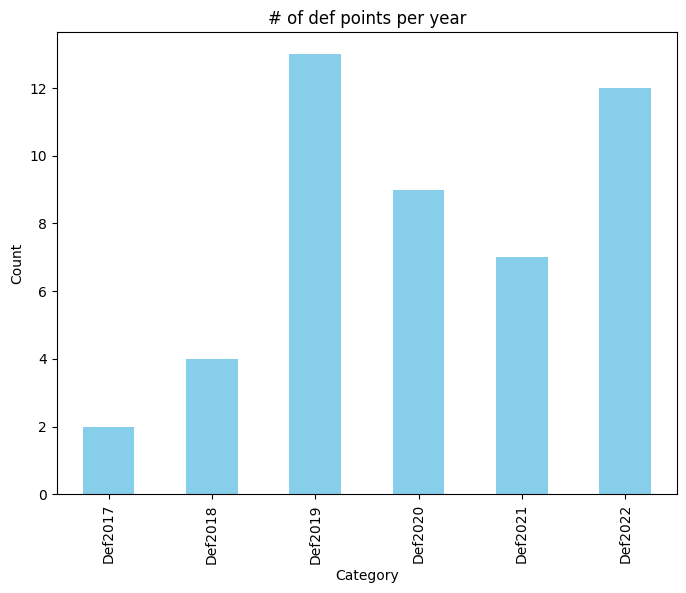

In [57]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo_nodup[merged_ceo_nodup['Ref_Change_Year_1622'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1622'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

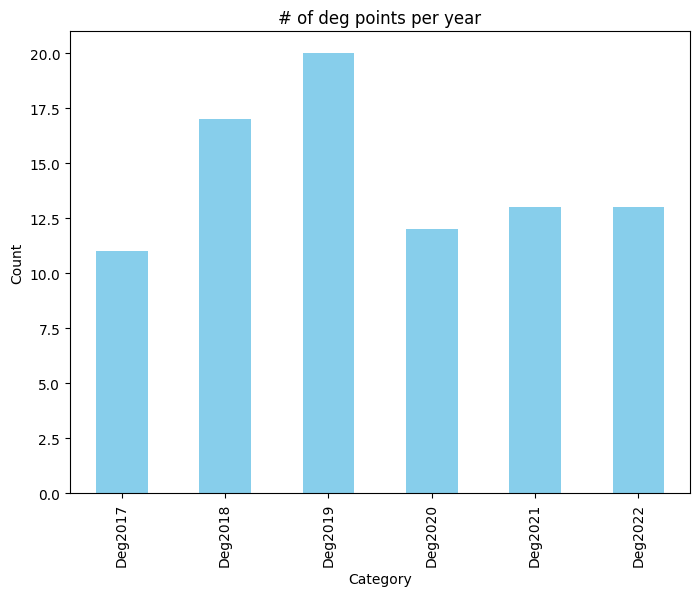

In [58]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo_nodup[merged_ceo_nodup['Ref_Change_Year_1622'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1622'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [59]:
print(merged_ceo_nodup.dtypes)

plotid                      int64
point_id                    int64
sampleid                    int64
lon                       float64
lat                       float64
sample_geom                object
Ref_FNF_2016               object
Ref_NFtype_2016            object
Ref_Ftype_2016             object
Ref_Change_1622            object
Ref_Change_Type_1622       object
Ref_Year_1622             float64
Ref_Driver_1622            object
Ref_Fire_1622              object
Other                      object
Ref_Change2_1622           object
Ref_Change2_Type_1622      object
Ref_Driver2_1622           object
Ref_Fire2_1622             object
Other2                     object
Ref_Regeneration           object
Ref_Regen_Year            float64
Ref_FNF_2022               object
Ref_NFtype_2022            object
Ref_Ftype_2022             object
Commentaires               object
collection                 object
interpreted                 int64
Ref_LCover_2016            object
Ref_Change_Yea

### 4. export ceo data to one csv file

In [60]:
merged_ceo_nodup.to_csv(ceo_data_out,index_label='ID')